In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
tbl_measurement=Base.classes.measurement
tbl_station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date_max = session.query(tbl_measurement.date).order_by(tbl_measurement.date.desc())[0][0]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_array = date_max.split('-')

# Calculate the date one year from the last date in data set.
# adjust by a day if the original date is Feb 29
if (date_array[1]=='02') & (date_array[2]=='29'):
    date_array[2]=str(int(date_array[2])-1)

#Subtract 1 year
date_min = str(int(date_array[0])-1) + "-" + date_array[1] + "-" + date_array[2]

# Perform a query to retrieve the data and precipitation scores
query_prcp = session.query(tbl_measurement.date,tbl_measurement.prcp).filter(tbl_measurement.date.between(date_min,date_max)).filter(tbl_measurement.prcp.isnot(None)).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_rows = [{"date": row[0], "precipitation": row[1]} for row in query_prcp]
df_prcp = pd.DataFrame(query_rows).set_index("date")

# Sort the dataframe by date
df_prcp=df_prcp.sort_values("date")


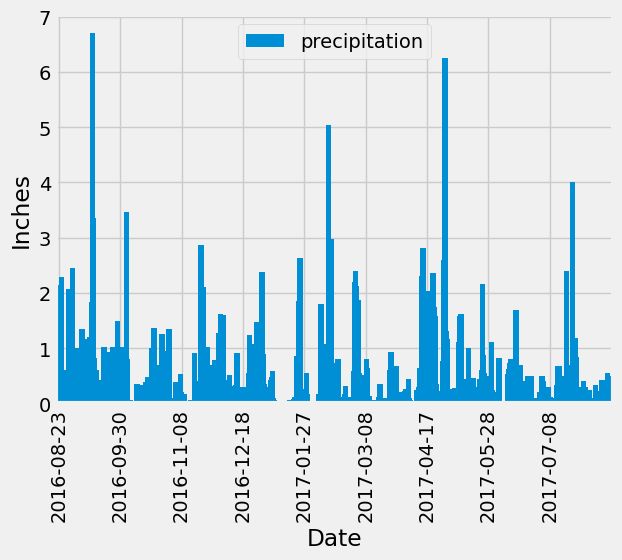

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
df_plot = df_prcp.plot(kind="bar",xlabel="Date",ylabel="Inches", width=20)
plt.locator_params(axis='x', nbins=9)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
mean_data = round(df_prcp['precipitation'].mean(),2)
std_data = round(df_prcp['precipitation'].std(),2)

print(f"The mean precipitation is {round(df_prcp['precipitation'].mean(),2)} inches")
print(f"The standard deviation is {round(df_prcp['precipitation'].std(),2)}")

The mean precipitation is 0.18 inches
The standard deviation is 0.46


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(tbl_station.station).group_by(tbl_station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(tbl_measurement.station,func.count(tbl_measurement.station)).group_by(tbl_measurement.station).order_by(func.count(tbl_measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(tbl_measurement.tobs)).filter(tbl_measurement.station=='USC00519281')[0][0]
max_temp = session.query(func.max(tbl_measurement.tobs)).filter(tbl_measurement.station=='USC00519281')[0][0]
avg_temp = session.query(func.avg(tbl_measurement.tobs)).filter(tbl_measurement.station=='USC00519281')[0][0]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_tobs = session.query(tbl_measurement.tobs).filter(tbl_measurement.station=='USC00519281').filter(tbl_measurement.date.between(date_min,date_max)).all()
query_rows = [{"tobs": row[0]} for row in query_tobs]

df_tobs = pd.DataFrame(query_rows)

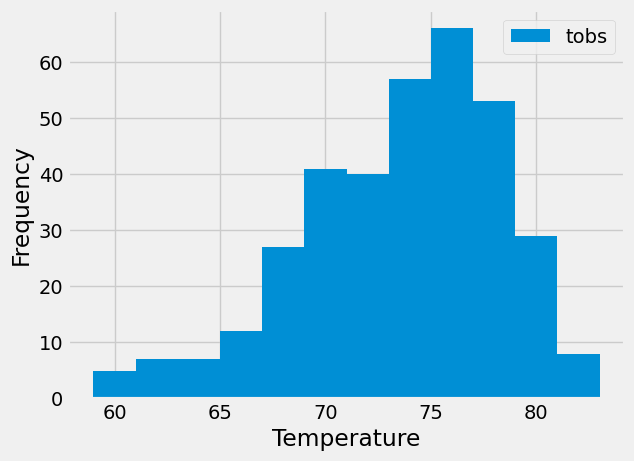

In [17]:
df_tobs.plot(kind="hist", bins=12,xlabel="Temperature",ylabel="Frequency")
plt.show()

# Close Session

In [18]:
# Close Session
session.close()